## Final Project Submission

Please fill out:
* Group name: Group 2
* Student pace: Hybrid
* Scheduled project review date/time: 13/01/2025
* Instructor name: William Okomba


**Authors**: Felix Mwendwa, Acinath Onkendi, Kago Ruburu, Lisa Mwangi, Simon ndichu, Vincent Mutuku

# Business Understanding
Over the years, there has been a drastic change in movie production. Hence it is crucial to understand the types of films that are currently doing the best in the movie industry. Our goal is to come up with an analysis that will help the company come up with actionable insights that can enable it create films that will be a success.

## Objectives
`Main Objective`
* To determine the type of Genres performing the best (**Highly rated genres and the trend**).

`Specific Objectives`
* To analyze budget cost and performance of movies in each.
* To analyze amount of revenue generated by different genres.
* To determine the directors who have produced top movies.
* To understand competition by analyzying different studio performance.

# Data Understanding
- The data we used for analysis are from:
    
    **Box Office Mojo**: It is used to track box office revenue and performance of movie.
    
    **Rotten Tomatoes**: It is a website used for movie reviews and rating.
    
    **The Numbers**: It offers data and analysis on movie box office earnings, production budgets, and related financial aspects.
    
    **IMDB**: It serves as a comprehensive database for movie, TV, and celebrity information.


We used 4 datasets and 2 tables from  a database, here we merged them to create 3 datasets that would help us to analyze and get findings that aligned with our objectives:
* Dataset 1(Box Office Mojo dataset 'bom_movie' and The numbers 'tn_movie'.): It has `5782` rows and `11` columns.
* Dataset 2(IMDB Database **Movie basics and Movie rating**): It has `65720` rows and `7` columns.
* Dataset 3(Rotten Tomatoes Rating and  Review): It has `54345` rows and `7` columns


## Data Description
Here we did a concise summary of each dataframes. 

In [1]:
# import libraries 
import pandas as pd 
import numpy as np
from scipy import stats
import itertools 
from numbers import Number
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import pickle

In [2]:
# load dataset box office mojo
bom_movie= pd.read_csv('zippedData/bom.movie_gross.csv.gz')
bom_movie

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [3]:
# check data summary
bom_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [4]:
# checking statistical summary of categorical columns
bom_movie.describe(include='O')     # 'o' represents object(category)

,title,studio,foreign_gross
count,3387,3382,2037
unique,3386,257,1204
top,Bluebeard,IFC,1200000
freq,2,166,23


In [5]:
# checking statistical summary of numerical columns
bom_movie.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [6]:
# load revenue dataset
tn_movie= pd.read_csv("zippedData/tn.movie_budgets.csv.gz")
tn_movie

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [7]:
# checking data summary
tn_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [8]:
# checking statistical summary for categorical columns
tn_movie.describe(include= 'O').T

,count,unique,top,freq
release_date,5782,2418,"Dec 31, 2014",24
movie,5782,5698,Halloween,3
production_budget,5782,509,"$20,000,000",231
domestic_gross,5782,5164,$0,548
worldwide_gross,5782,5356,$0,367


In [9]:
# load rotten tomatoes (movie info) dataset
rt_movie= pd.read_csv("zippedData/rt.movie_info.tsv.gz", sep="\t")
rt_movie

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [10]:
# checking data summary
rt_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [11]:
# checking statistical summary of categorical columns.
rt_movie.describe(include= 'O').T

,count,unique,top,freq
synopsis,1498,1497,A group of air crash survivors are stranded in...,2
rating,1557,6,R,521
genre,1552,299,Drama,151
director,1361,1125,Steven Spielberg,10
writer,1111,1069,Woody Allen,4
theater_date,1201,1025,"Jan 1, 1987",8
dvd_date,1201,717,"Jun 1, 2004",11
currency,340,1,$,340
box_office,340,336,"600,000",2
runtime,1530,142,90 minutes,72


In [12]:
# load rotten tomato (reviews) dataset
rt_review= pd.read_csv("zippedData/rt.reviews.tsv.gz", sep="\t", encoding= 'latin1')
rt_review

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [13]:
#checking data summary
rt_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [14]:
# checking statistical summary of categorical columns
rt_review.describe(include= 'O')

,review,rating,fresh,critic,publisher,date
count,48869,40915,54432,51710,54123,54432
unique,48682,186,2,3496,1281,5963
top,Parental Content Review,3/5,fresh,Emanuel Levy,eFilmCritic.com,"January 1, 2000"
freq,24,4327,33035,595,673,4303


In [15]:
# checking statistical summary of numerical columns
rt_review.describe(include= ['int', 'float'])

,id,top_critic
count,54432.000000,54432.000000
mean,1045.706882,0.240594
std,586.657046,0.427448
min,3.000000,0.000000
25%,542.000000,0.000000
50%,1083.000000,0.000000
75%,1541.000000,0.000000
max,2000.000000,1.000000


In [16]:
# check the content for the imdb database
# connect to database
conn= sqlite3.connect('zippedData/im.db')

pd.read_sql("""SELECT name
                   FROM sqlite_master
                   WHERE type= 'table';""", conn)


,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


# Data cleaning and Preparation.

**In this section we conducted the following activities:**
* Drop unnecessary columns.
* Feature Engineering.
* Handle missing values.
* Check for duplicates.
* Merging of dataframes.

In [17]:
# data cleaning (movie_info)
# load  dataset
rt_movie= pd.read_csv("zippedData/rt.movie_info.tsv.gz", sep='\t')

# create a copy of the dataset
df_rt= rt_movie.copy(deep= True)
df_rt.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [18]:
# drop unnecessary columns ie synopsis 
del df_rt['synopsis']

# confirm if the column has been dropped
df_rt.columns

Index(['id', 'rating', 'genre', 'director', 'writer', 'theater_date',
       'dvd_date', 'currency', 'box_office', 'runtime', 'studio'],
      dtype='object')

In [19]:
# checking count of missing values
df_rt.isna().sum()

id                 0
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [20]:
# dropping columns that have many missing values(by 30%)
threshold= 0.3

# create a count for missing values
missing_count= df_rt.isna().sum()

# get the number of rows in the dataframe
rows= len(df_rt)

# create a list of columns surpassing the set threshold
col= [i for i in df_rt.columns if missing_count[i]/rows > threshold]

# drop the column
df_rt.drop(columns= col, inplace= True)
df_rt

,id,rating,genre,director,writer,theater_date,dvd_date,runtime
0,1,R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes
1,3,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes
2,5,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",116 minutes
3,6,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",128 minutes
4,7,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,200 minutes
...,...,...,...,...,...,...,...,...
1555,1996,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",106 minutes
1556,1997,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",88 minutes
1557,1998,G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",111 minutes
1558,1999,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",101 minutes


In [21]:
# checking count of missing values
df_rt.isna().sum()

id                0
rating            3
genre             8
director        199
writer          449
theater_date    359
dvd_date        359
runtime          30
dtype: int64

In [22]:
# create a list
col= ['director', 'writer', 'theater_date', 'dvd_date']

# fill the missing values with NaN in the column
df_rt[col]= df_rt[col].fillna('NaN')

# check if there are any changes
df_rt.isna().sum()

id               0
rating           3
genre            8
director         0
writer           0
theater_date     0
dvd_date         0
runtime         30
dtype: int64

In [23]:
# impute runtime column using mode since it is a categorical column.
runtime_mode= df_rt['runtime'].mode()[0]
df_rt['runtime']= df_rt['runtime'].fillna(runtime_mode)

# checking count of missing values
df_rt['runtime'].isnull().sum()

0

In [24]:
# drop missing value from the remaining columns since they have a little missing values
df_rt= df_rt.dropna()

# checking count of missing values
df_rt.isna().sum()

id              0
rating          0
genre           0
director        0
writer          0
theater_date    0
dvd_date        0
runtime         0
dtype: int64

In [25]:
# check for duplicates
df_rt.duplicated().sum()

0

In [26]:
# reset the index of the cleaned data
rt_df= df_rt.reset_index(drop= True)
rt_df

,id,rating,genre,director,writer,theater_date,dvd_date,runtime
0,1,R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes
1,3,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes
2,5,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",116 minutes
3,6,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",128 minutes
4,7,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,200 minutes
...,...,...,...,...,...,...,...,...
1547,1996,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",106 minutes
1548,1997,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",88 minutes
1549,1998,G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",111 minutes
1550,1999,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",101 minutes


In [27]:
#clean the rt_review dataset
#create a copy of the dataset
df_review= rt_review.copy(deep= True)

In [28]:
#checking the columns
df_review.columns

Index(['id', 'review', 'rating', 'fresh', 'critic', 'top_critic', 'publisher',
       'date'],
      dtype='object')

In [29]:
#picking columns of interest
col = ["id", "fresh", "top_critic", "date"]
df_review[col]

,id,fresh,top_critic,date
0,3,fresh,0,"November 10, 2018"
1,3,rotten,0,"May 23, 2018"
2,3,fresh,0,"January 4, 2018"
3,3,fresh,0,"November 16, 2017"
4,3,fresh,0,"October 12, 2017"
...,...,...,...,...
54427,2000,fresh,1,"September 24, 2002"
54428,2000,rotten,0,"September 21, 2005"
54429,2000,rotten,0,"July 17, 2005"
54430,2000,rotten,0,"September 7, 2003"


In [30]:
# checking count of missing values
df_review[col].isna().sum()

id            0
fresh         0
top_critic    0
date          0
dtype: int64

In [31]:
#check for duplicates
df_review[col].duplicated().sum()

23381

In [32]:
# clean bom_movie(Box Office Mojo) dataset
# create a copy of the dataset
df_bom= bom_movie.copy(deep= True)
df_bom

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [33]:
# checking count of missing values
df_bom.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [34]:
# check the data type of each column
df_bom.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

The median is:  1400000.0


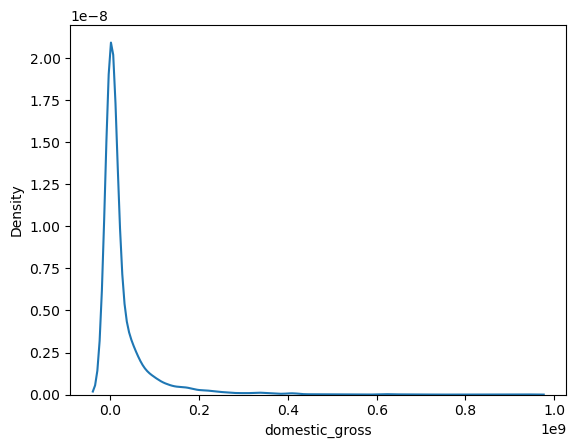

In [35]:
# check skewness of domestic gross column using lineplot.
sns.kdeplot(data=df_bom, x= 'domestic_gross')

# get the median
bom_median = df_bom["domestic_gross"].median()
print('The median is: ', bom_median)

# impute missing value using median
df_bom["domestic_gross"].fillna(bom_median,inplace=True)

In [36]:
# checking count of missing values
df_bom.isna().sum()

title                0
studio               5
domestic_gross       0
foreign_gross     1350
year                 0
dtype: int64

In [37]:
# fill missing value using unknown (unk)
df_bom['studio'].fillna('unk', inplace= True)

df_bom['foreign_gross'].fillna('unk',inplace=True)

### Merging

#### Dataset 1 (tn_bom)
- Here we have merged 2 datasets: **Box Office Mojo dataset 'bom_movie' and The numbers 'tn_movie'**.

In [38]:
# rename movie column --> title in the tn movie_dataset
tn_movie= tn_movie.rename(columns= {"movie": "title"})
tn_movie.columns

Index(['id', 'release_date', 'title', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

In [39]:
# merge the datasets using left join
tn_bom= pd.merge(tn_movie, df_bom, on= 'title', how= 'left')
tn_bom

,id,release_date,title,production_budget,domestic_gross_x,worldwide_gross,studio,domestic_gross_y,foreign_gross,year
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",NaN,NaN,NaN,NaN
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",BV,241100000.0,804600000,2011.0
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",NaN,NaN,NaN,NaN
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",BV,459000000.0,946400000,2015.0
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,NaN,NaN,NaN,NaN
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495",NaN,NaN,NaN,NaN
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338",NaN,NaN,NaN,NaN
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0,NaN,NaN,NaN,NaN


In [40]:
# checking data summary
tn_bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   title              5782 non-null   object 
 3   production_budget  5782 non-null   object 
 4   domestic_gross_x   5782 non-null   object 
 5   worldwide_gross    5782 non-null   object 
 6   studio             1247 non-null   object 
 7   domestic_gross_y   1247 non-null   float64
 8   foreign_gross      1247 non-null   object 
 9   year               1247 non-null   float64
dtypes: float64(2), int64(1), object(7)
memory usage: 451.8+ KB


In [41]:
# convert release_date from object to datetime
tn_bom['release_date']= pd.to_datetime(tn_bom['release_date'])

# remove (,) and ($) in the values
# create a list of the columns being modified
finance= ['production_budget', 'domestic_gross_x', 'worldwide_gross',]

# loop through the columns for modification
for col in finance:
    tn_bom[col]= tn_bom[col].astype(str).str.replace(",", "").str.replace("$", "").astype(str)

# convert the finance columns to float
for col in finance:
    tn_bom[col]= tn_bom[col].astype(float)

In [42]:
# drop unnecessary columns
columns= ["domestic_gross_y", "foreign_gross", "year"]

for col in columns:
    del tn_bom[col]

In [43]:
tn_bom.head()

,id,release_date,title,production_budget,domestic_gross_x,worldwide_gross,studio
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,NaN
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,BV
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,NaN
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,BV
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,NaN


`Feature Engineering`
- We decided to create new columns **foreign gross** and **profit**

In [44]:
# creating a new column to get foreign gross and profit
tn_bom['foreign_gross']= tn_bom['worldwide_gross']-tn_bom['domestic_gross_x']
tn_bom['profit'] = tn_bom['worldwide_gross'] - tn_bom['production_budget']
tn_bom.head(3)

,id,release_date,title,production_budget,domestic_gross_x,worldwide_gross,studio,foreign_gross,profit
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,NaN,2.015838e+09,2.351345e+09
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,BV,8.046000e+08,6.350639e+08
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,NaN,1.070000e+08,-2.002376e+08


In [45]:
tn_bom.shape # check the number of rows and columns the dataset has. 

(5782, 9)

### Dataset 2 (imdb)
- We chose **movie_basics** and **movie_ratings** tables since they align with our objectives.

In [46]:
# read movie_basics

pd.read_sql("""SELECT *
               FROM movie_basics;""",
conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [47]:
# read movie_ratings
pd.read_sql("""SELECT * 
               FROM movie_ratings;"""
,conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [48]:
# join movie_basics and movie ratings
imdb= pd.read_sql("""SELECT *
                     FROM movie_basics
                     INNER JOIN movie_ratings
                         USING (movie_id);""",conn)

In [49]:
# checking data summary
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [50]:
# checking count of missing values
imdb.isna().sum()

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

In [51]:
# drop unnnecessary columns 
imdb.drop('original_title', axis=1, inplace= True)

In [52]:
# drop rows with missing values.
imdb_db= imdb.dropna()

In [53]:
# checking count of missing values
imdb_db.isna().sum()

movie_id           0
primary_title      0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64

In [54]:
imdb_db.head()

,movie_id,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
6,tt0137204,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263


In [55]:
# save the dataset
imdb_db= imdb_db.to_csv("TheMovieDb.csv", index= False)

In [56]:
imdb_db.shape # checking row and columns

AttributeError: 'NoneType' object has no attribute 'shape'

### Dataset 3
- We chose to merge the **Rotten Tomato** datasets(df_review and df_rt)

In [56]:
df_rt.head()

,id,rating,genre,director,writer,theater_date,dvd_date,runtime
0,1,R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes
1,3,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes
2,5,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",116 minutes
3,6,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",128 minutes
4,7,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,200 minutes


In [57]:
df_review.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [58]:
# merge the datsets using inner join(common columnn is [id])
rt_merged= pd.merge(df_rt, rt_review, on= 'id', how= 'inner')
rt_merged.head()

,id,rating_x,genre,director,writer,theater_date,dvd_date,runtime,review,rating_y,fresh,critic,top_critic,publisher,date
0,3,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [89]:
# extract columns of interest
col= ['genre', 'director', 'writer', 'rating_x', 'rating_y', 'runtime', 'fresh']
rt_int= rt_merged[col]
# save dataset
rt_int= rt_int.to_csv("Rotten_tomatoData.csv", index= False)
# read dataset
rt_int= pd.read_csv("Rotten_tomatoData.csv")
rt_int

,genre,director,writer,rating_x,rating_y,runtime,fresh
0,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,R,3/5,108 minutes,fresh
1,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,R,NaN,108 minutes,rotten
2,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,R,NaN,108 minutes,fresh
3,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,R,NaN,108 minutes,fresh
4,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,R,NaN,108 minutes,fresh
...,...,...,...,...,...,...,...
54340,Action and Adventure|Art House and Internation...,NaN,Luc Besson,R,NaN,94 minutes,fresh
54341,Action and Adventure|Art House and Internation...,NaN,Luc Besson,R,1/5,94 minutes,rotten
54342,Action and Adventure|Art House and Internation...,NaN,Luc Besson,R,2/5,94 minutes,rotten
54343,Action and Adventure|Art House and Internation...,NaN,Luc Besson,R,2.5/5,94 minutes,rotten


In [60]:
rt_int.shape   # check rows and columns

(54345, 7)

- Our columns of interest are **genre, director, writer, rating_x, rating_y, runtime** and **fresh**.

## Exploratory Data Analysis

### 1. Univariate Analysis

### Top 10 Genres

In [61]:
#checking columns
tn_bom.columns

Index(['id', 'release_date', 'title', 'production_budget', 'domestic_gross_x',
       'worldwide_gross', 'studio', 'foreign_gross', 'profit'],
      dtype='object')

In [62]:
# drops rows where column has NaN values
genres_split= imdb_db.dropna(subset=['genres'])
# Split the 'genres' column by commas into lists
genres_split['genres'] = genres_split['genres'].str.split(',')

# explode the columns into different rows 
genre_explode= genres_split['genres'].explode()

# get the top 10 genres
genre_count= genre_explode.value_counts()[:10]
genre_count

genres
Drama          28394
Documentary    16423
Comedy         15514
Thriller        7583
Horror          6917
Action          6297
Romance         5976
Crime           4338
Biography       3693
Adventure       3621
Name: count, dtype: int64

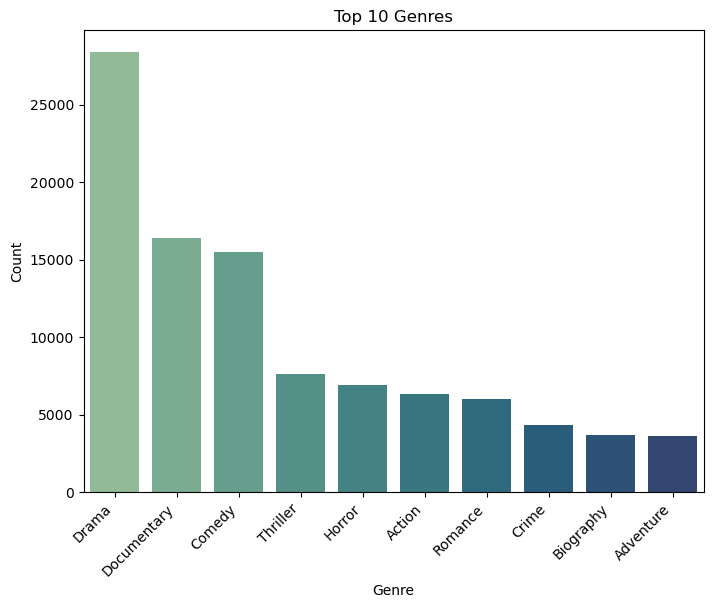

In [63]:
# create a visual using barplot
genre_df = genre_count.reset_index()
genre_df.columns = ['Genre', 'Count']
plt.figure(figsize= (8,6))

# create a bar plot
sns.barplot(x= 'Genre', y= 'Count', data= genre_df, palette= 'crest')

# title and label
plt.xlabel("Genre")
plt.ylabel("Count")
plt.title("Top 10 Genres")

# customize xticks
plt.xticks(rotation= 45, ha= "right");


* Most movies produced are under the category `Drama`

## Studios
### Top 10 studios

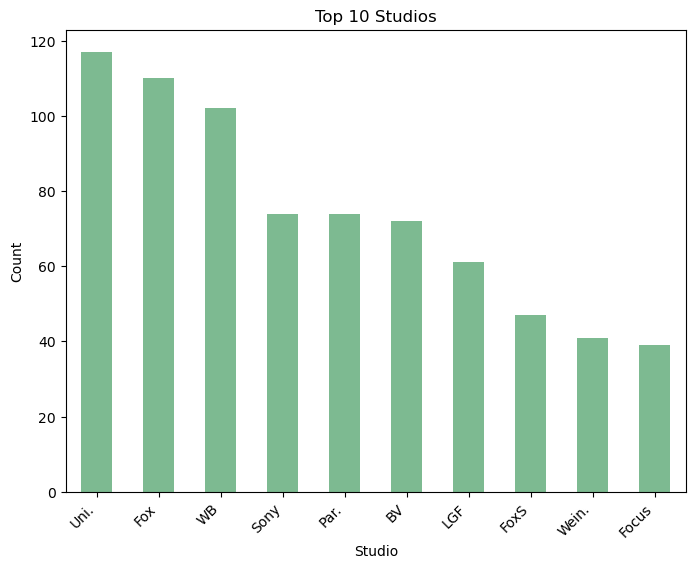

In [64]:
# get the top 10 studios
studio_count = tn_bom['studio'].value_counts().nlargest(10)

# Create a bar plot
plt.figure(figsize=(8, 6))
# Set color palette
sns.set_palette("crest")
ax = studio_count.plot(kind="bar")

# title and labels
plt.title("Top 10 Studios")
plt.xlabel("Studio")
plt.ylabel("Count")

# customize xticks
plt.xticks(rotation=45, ha="right");

* `Universal studio` produced most movies throughout the years

## 2. Bivariate Analysis

### Average rating By Genre

In [65]:
#checking columns 
imdb_db.columns

Index(['movie_id', 'primary_title', 'start_year', 'runtime_minutes', 'genres',
       'averagerating', 'numvotes'],
      dtype='object')

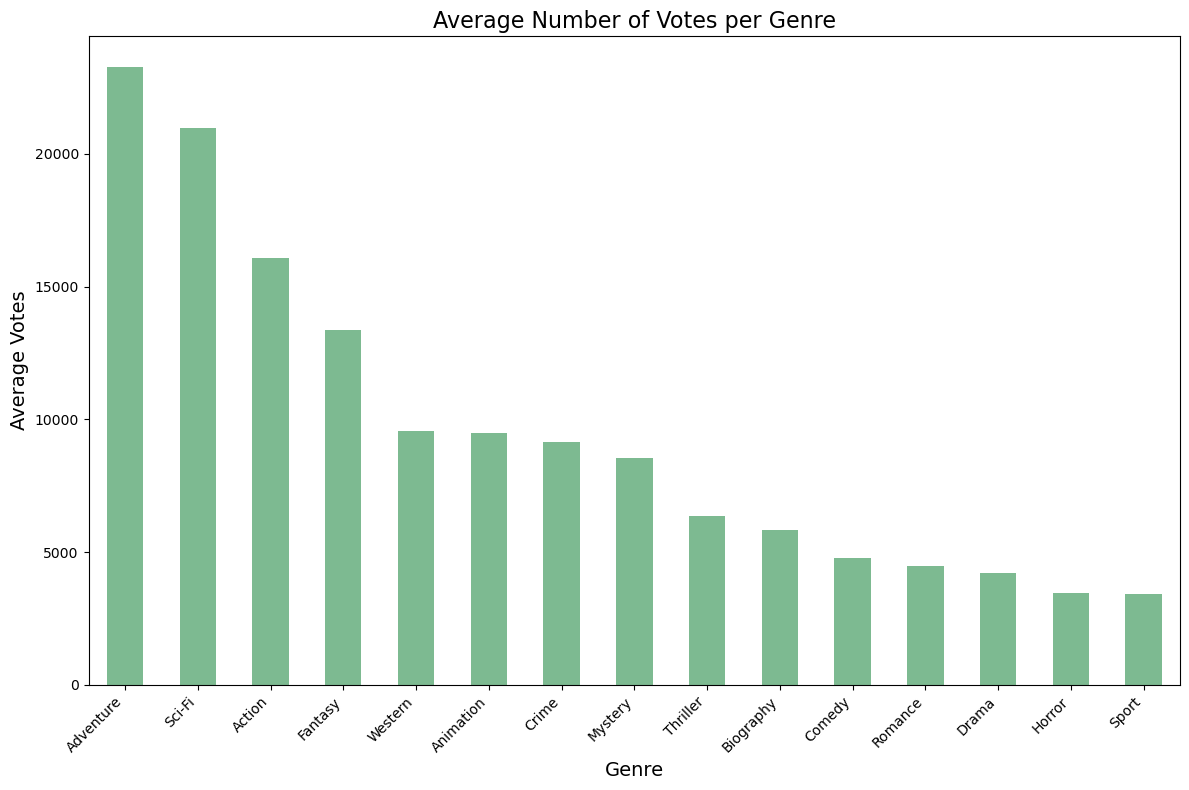

In [66]:
# ensure the genres column doesn't have NaN values
genre_count = imdb_db.dropna(subset=['genres'])

# split genres into separate rows 
genre_exploded = genre_count.assign(genres=genre_count['genres'].str.split(',')).explode('genres')

# Calculate the average number of votes per genre
avg_rating_by_genre = genre_exploded.groupby('genres')['numvotes'].mean().sort_values().nlargest(15)

# create a visual
plt.figure(figsize=(12, 8))
sns.set_palette('crest')
avg_rating_by_genre.plot(kind='bar')
plt.title('Average Number of Votes per Genre', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Average Votes', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout();

* Most voted genre by the audiences are `Adventure`

### Average production Budget of the top 10 studios

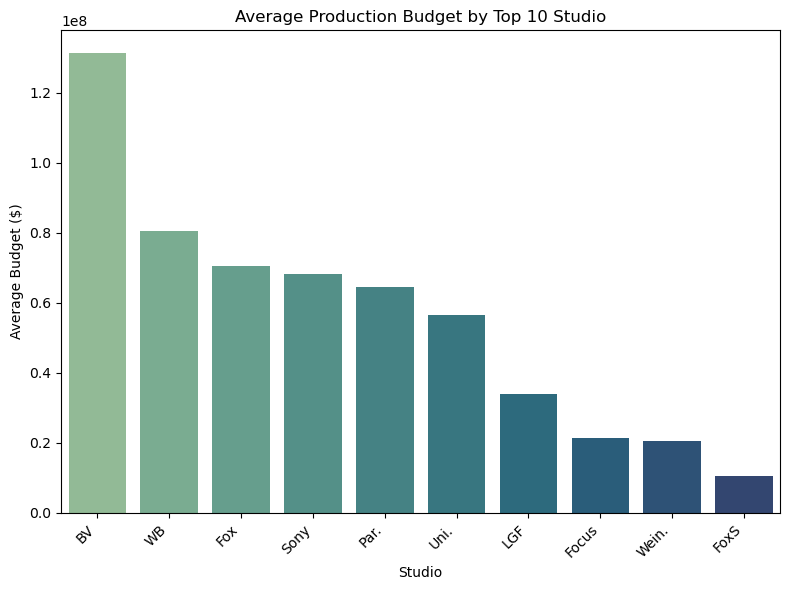

In [67]:
# get the top 10 studios by count
studio_count = tn_bom['studio'].value_counts().nlargest(10).index

# filter the dataset to include only the top 10 studios
top_studios = tn_bom[tn_bom['studio'].isin(studio_count)]

# group by studio and calculate the average production budget
average_budget_by_studio = top_studios.groupby('studio')['production_budget'].mean().sort_values(ascending=False)

# create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=average_budget_by_studio.index, y=average_budget_by_studio.values, palette='crest')

# title and labels
plt.title("Average Production Budget by Top 10 Studio")
plt.xlabel("Studio")
plt.ylabel("Average Budget ($)")
plt.xticks(rotation= 45, ha="right")  
plt.tight_layout();  

* `BV Studios` used the most amount of money for movie production among the top 10 studios.

### Average worldwide and production budget throughout the year

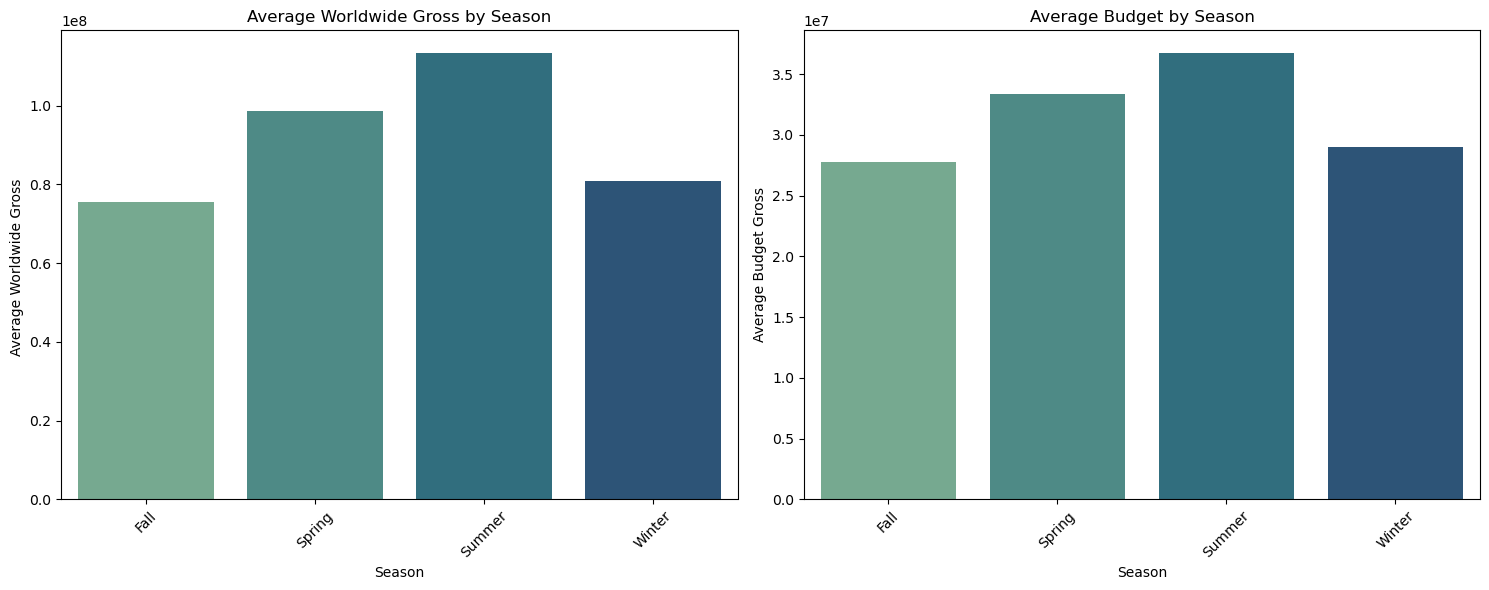

In [68]:
# extract the month from to determine the season
tn_bom['month'] = tn_bom['release_date'].dt.month

# categorize months into seasons
# define a function
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

tn_bom['season'] = tn_bom['month'].apply(get_season)

# group by season and the average of worldwide gross and domestic gross
season_gross = tn_bom.groupby('season')[['worldwide_gross', 'production_budget']].mean().reset_index()

# create subplots 
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# plot Worldwide Gross
sns.barplot(data=season_gross, x='season', y='worldwide_gross', palette='crest', ax=axes[0])
axes[0].set_title("Average Worldwide Gross by Season")
axes[0].set_xlabel("Season")
axes[0].set_ylabel("Average Worldwide Gross ")
axes[0].tick_params(rotation=45, axis='x')

# plot Domestic Gross
sns.barplot(data=season_gross, x='season', y='production_budget', palette='crest', ax=axes[1])
axes[1].set_title("Average Budget by Season")
axes[1].set_xlabel("Season")
axes[1].set_ylabel("Average Budget Gross")
axes[1].tick_params(rotation=45, axis='x')  

plt.tight_layout();

### Analyze Directors

In [69]:
rt_int.head()

,genre,director,writer,rating_x,rating_y,runtime,fresh
0,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,R,3/5,108 minutes,fresh
1,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,R,NaN,108 minutes,rotten
2,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,R,NaN,108 minutes,fresh
3,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,R,NaN,108 minutes,fresh
4,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,R,NaN,108 minutes,fresh


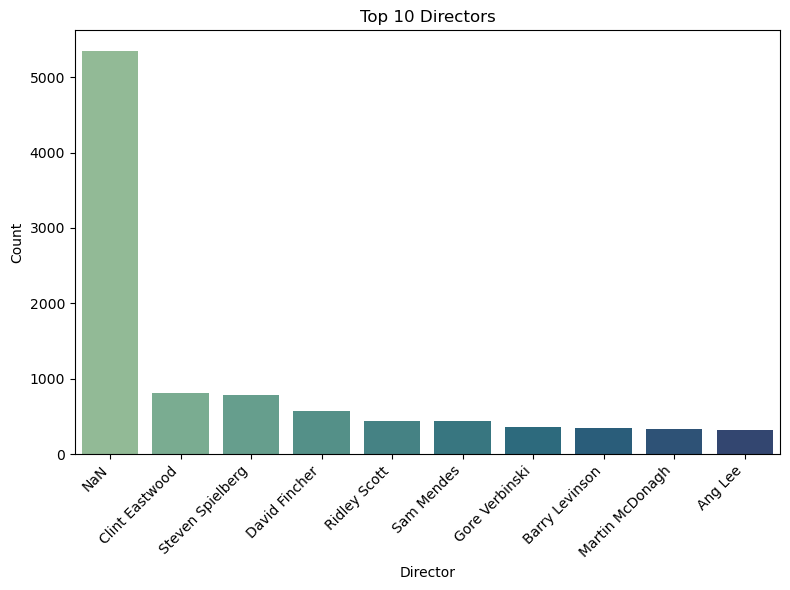

In [70]:
# remove rows with NaN values in the director and writer column
filtered_rt_int = rt_int.dropna(subset=['director'])

# get the top 10 directors by the number of movies
director_count= filtered_rt_int['director'].value_counts().nlargest(10).reset_index()
director_count.columns = ['director', 'director_count']


# create a bar plot
plt.subplots(figsize=(8, 6))
sns.barplot(x='director', y='director_count', data=director_count, palette="crest")

# customize the plot
plt.title("Top 10 Directors")
plt.xlabel('Director')
plt.ylabel('Count')  
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

### Average Return on Investments By Genres

In [82]:
tn_bom.head(3)

,id,release_date,title,production_budget,domestic_gross_x,worldwide_gross,studio,foreign_gross,profit,month,season,ROI
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,NaN,2.015838e+09,2.351345e+09,12,Winter,553.257713
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,BV,8.046000e+08,6.350639e+08,5,Spring,154.667286
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,NaN,1.070000e+08,-2.002376e+08,6,Summer,-57.210757


In [84]:
# save the file
tn_bom= tn_bom.to_csv("Budgetdata.csv", index= False)

In [76]:
imdb_db.head()

,movie_id,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
6,tt0137204,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263


In [81]:
# drops rows where column has NaN values
imdb_db= imdb_db.dropna(subset=['genres'])
# Split the 'genres' column by commas into lists
imdb_db['genres'] = imdb_db['genres'].str.split(',')

# explode the columns into different rows 
imdb_db= imdb_db.explode('genres')
imdb_db.head(3)

,movie_id,title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,2013,175.0,Action,7.0,77
0,tt0063540,Sunghursh,2013,175.0,Crime,7.0,77
0,tt0063540,Sunghursh,2013,175.0,Drama,7.0,77


In [78]:
# get ROI (Return on Investment)
tn_bom['ROI']= ((tn_bom['worldwide_gross'] - tn_bom['production_budget']) / tn_bom['production_budget']) * 100
tn_bom['ROI']

0         553.257713
1         154.667286
2         -57.210757
3         324.384139
4         315.369636
            ...     
5777     -100.000000
5778     3908.250000
5779      -73.240000
5780     -100.000000
5781    16358.272727
Name: ROI, Length: 5782, dtype: float64

In [79]:
# rename primary title to title for merging
imdb_db= imdb_db.rename(columns= {'primary_title': 'title'})
print(imdb_db.columns)
# merge the ROI and genre
roi_genre= pd.merge(tn_bom, imdb_db, on= 'title', how= 'left')

# group ROI and genre
genre_roi= roi_genre.groupby('genres')['ROI'].mean().reset_index()

# sort in descending order
genre_roi= genre_roi.sort_values(by='ROI', ascending=False)
genre_roi

Index(['movie_id', 'title', 'start_year', 'runtime_minutes', 'genres',
       'averagerating', 'numvotes'],
      dtype='object')


,genres,ROI
11,Horror,728.926817
14,Mystery,619.723733
19,Thriller,466.821166
3,Biography,390.656471
18,Sport,355.135997
9,Fantasy,339.441263
2,Animation,330.064940
6,Documentary,327.620082
8,Family,319.950910
16,Romance,296.496295


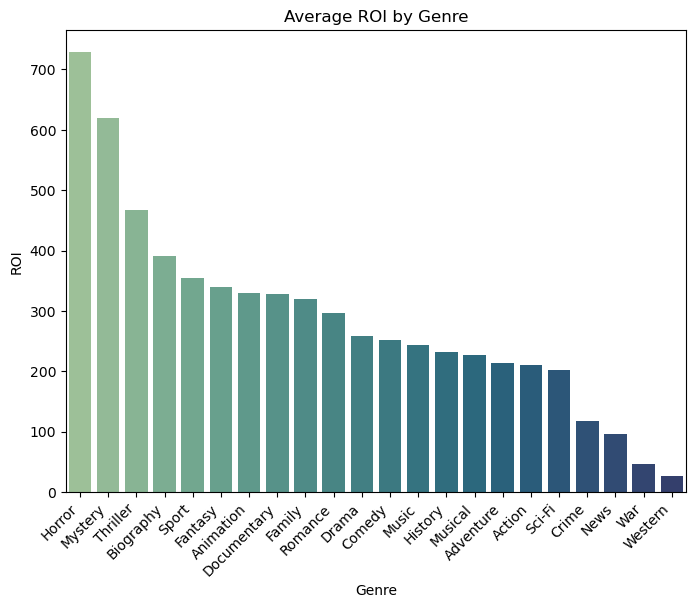

In [80]:
# create a visual 
plt.figure(figsize= (8, 6))
sns.barplot(x= 'genres', y= 'ROI', data= genre_roi, palette= 'crest')
plt.title('Average ROI by Genre')
plt.xlabel('Genre')
plt.ylabel('ROI')
plt.xticks(rotation= 45, ha= 'right')
plt.show()

- Here we understood that **Horror** genre is a good investment because it is profitable as compared to the other genres.

#### Checking correlation between production budget and the worldwirde gross using scatter plot

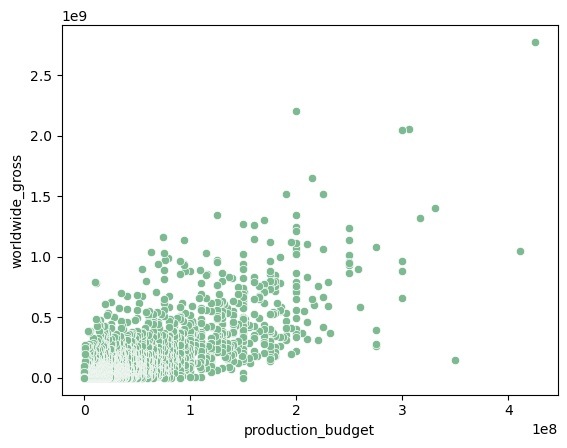

In [71]:
#plot a graph for production budget against worldwide gross 
sns.scatterplot(data=tn_bom, x='production_budget', y='worldwide_gross');

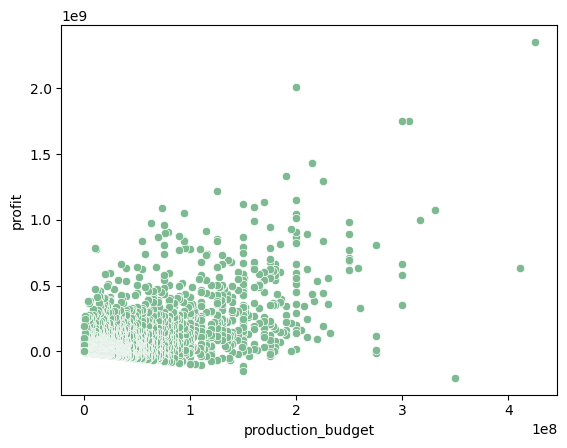

In [72]:
#plot a graph for production budget against profit
sns.scatterplot(data=tn_bom, x='production_budget', y='profit');

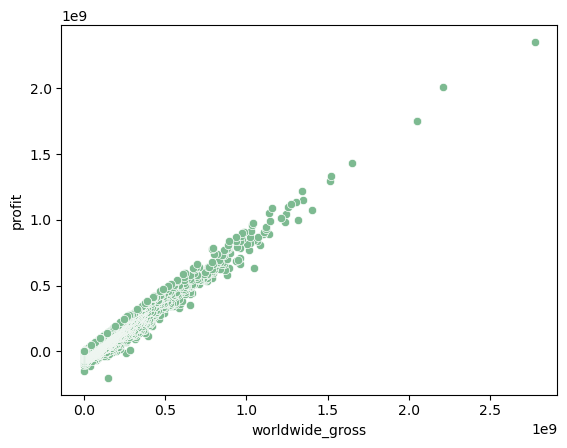

In [73]:
#plot a graph for worldwide gross against profit
sns.scatterplot(data=tn_bom, x='worldwide_gross', y='profit');

The scatter plot shows that there might be a relationship between the production budget and the worldwide gross. We can therefore use a statistical test - pearson correlation to confirm if there's a relationship between the two.

The null hypothesis(H<sub>0</sub>) is that there is no correlation between the production budget and the worldwide gross while the alternative hypothesis H(<sub>1</sub>) is that there is a correlation between the production budget and the worldwide gross.

In [74]:
#import the pearson correlation coefficient
from scipy.stats import pearsonr

alpha = 0.05

#test for correlation btwn production budget and worldwide gross
correlation, p_value = pearsonr(tn_bom['production_budget'], tn_bom['worldwide_gross'])
print((correlation, p_value))

(0.7483059765694755, 0.0)


The correlation which is approximately 0.75 shows that there is a strong postive relationship between the production budget and the worldwide gross. Therefore, the higher the production budget, the higher the worldwide gross

On the other hand, a p-value of 0.0 which is less than 0.05 means that it is statistically significant hence we reject the null hypothesis(H<sub>0</sub>) and accept the alternative hypothesis(H<sub>1</sub>). 

We can therefore conclude that there is a correlation between the production budget and the worldwide gross.

We can thus give a recommendation to the company that the more money invested in creating a movie, the more revenue it will generate, hence high performance in the box office.

# Recommendations

* **Genres**
    * The Comapany should invest on producing Genres that have High return on Investment. This brings in investstors due to the high profit the studio produces.

* **Highly rated genres**
    * The company should take note of the highly rated genres ie Adventure, Sci-fi and action and focus on them.


* **Budget Management**
    * The Production management is highly correlated with the worldwide gross.So higher Budget goes with higher gross, it would  be recommendable to avoid producing movies on a low budget that will cause a low worldwide gross.
